### ADVANCE DATA ANALYTICS ETE-3

Shrey Gupta (MCA-CHRIST UNIVERSITY)

4MCA A 

2347154

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = 'Bank_Data.xlsx'
transaction_data = pd.read_excel(file_path, sheet_name='Transaction Data')
customer_data = pd.read_excel(file_path, sheet_name='Customer Demographics')
transaction_data.head()


,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [4]:
customer_data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender
0,1001,58,management,married,tertiary,839368,M
1,1002,44,technician,single,secondary,1452858,M
2,1003,33,entrepreneur,married,NaN,4851383,F
3,1004,47,blue collar,married,unknown,3207754,F
4,1005,33,unknown,single,unknown,2562322,M


In [5]:
transaction_data["Customer_number"].nunique(), transaction_data.shape,  customer_data.shape

(45211, (45211, 14), (45211, 7))

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45156 non-null  object 
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 4.8+ MB


From the info of the transaction data we can see that the data type of balance is of object type. We need to convert it into the int type

In [7]:
transaction_data['balance'] = pd.to_numeric(transaction_data['balance'], errors='coerce', downcast='integer')
transaction_data['balance'] = transaction_data['balance'].fillna(0).astype(int)

In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45211 non-null  int32  
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 4.7+ MB


Now the Balance column is converted to integer data type

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_number  45211 non-null  int64 
 1   age              45211 non-null  int64 
 2   job              45198 non-null  object
 3   marital          45193 non-null  object
 4   education        45190 non-null  object
 5   Annual Income    45194 non-null  object
 6   Gender           45211 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In Customer Data, also the Annual income is of object type we'll convert this in int type

In [10]:
customer_data['Annual Income'] = pd.to_numeric(customer_data['Annual Income'], errors='coerce', downcast='integer')
customer_data['Annual Income'] = customer_data['Annual Income'].fillna(0).astype(int)

In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_number  45211 non-null  int64 
 1   age              45211 non-null  int64 
 2   job              45198 non-null  object
 3   marital          45193 non-null  object
 4   education        45190 non-null  object
 5   Annual Income    45211 non-null  int32 
 6   Gender           45211 non-null  object
dtypes: int32(1), int64(2), object(4)
memory usage: 2.2+ MB


Now the Annual Income column is also converted to integer data type

In [12]:
transaction_data.isnull().sum()

Sno                  0
Customer_number      0
Insurance            0
balance              0
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

Checking for the Null values in the Transaction Data

In [13]:
transaction_data.fillna({'loan': 'unknown', 'contact': 'unknown', 'poutcome': 'unknown', 'Term Deposit': 'unknown'}, inplace=True)
transaction_data = transaction_data.dropna(subset=['Count_Txn'])
transaction_data['duration'] = transaction_data['duration'].fillna(transaction_data['duration'].mean())

Checking the Null values in the Transaction Data 
1) Contact,loan,poutcome,TermDeposit have missing Values are categorical Nature so i impute them with 'unknown'
2) Count_Txn contains only 1 missing value so i dropped it 
3) duration has missing values which is numerical in nature so i imputed it using mean

In [14]:
transaction_data.isnull().sum()

Sno                 0
Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

Now there are no null values in my Transaction Data

In [15]:
customer_data.isnull().sum()

Customer_number     0
age                 0
job                13
marital            18
education          21
Annual Income       0
Gender              0
dtype: int64

Checking for the Null values in the Customer Data

In [16]:
customer_data.fillna({'job': 'unknown', 'marital': 'unknown', 'education': 'unknown'}, inplace=True)

Checking for Null values in the Customer Data 
1) Job,Marital,education are the columns which have missing values are are categorical in nature so i impute them using 'unkown'

In [17]:
customer_data.isnull().sum()

Customer_number    0
age                0
job                0
marital            0
education          0
Annual Income      0
Gender             0
dtype: int64

In [18]:
transaction_data['Customer_number'].duplicated().value_counts()

Customer_number
False    45210
Name: count, dtype: int64

In [19]:

customer_data['Customer_number'].duplicated().value_counts()

Customer_number
False    45211
Name: count, dtype: int64

Now there are no Null values in the Customer Data

In [20]:
merged_data = pd.merge(transaction_data, customer_data, on='Customer_number', how='left')
merged_data.head(10)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,unknown,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368,M
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0,33,entrepreneur,married,unknown,4851383,F
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
5,5,1006,no,231,yes,no,unknown,139.0,1,2,0,unknown,no,490.0,35,management,married,ter tiary,3960603,M
6,6,1007,no,447,yes,yes,unknown,217.0,1,2,0,unknown,no,411.0,28,management,single,ter tiary,2383284,M
7,7,1008,yes,2,yes,no,unknown,380.0,1,2,0,pending,no,108.0,42,entrepreneur,divorced,tertiary,0,F
8,8,1009,no,121,yes,no,unknown,50.0,1,2,0,pending,no,328.0,58,retired,married,primary,1122246,F
9,9,1010,no,593,yes,no,unknown,55.0,1,2,0,pending,no,124.0,43,technician,single,secondary,1111232,M


Now merging both the Data on  the common column customer_name

•	Data Analysis & Visualization:

1. Income Insights:


How many customers have no annual income? Plot and present the data distribution of these customers.

Number of customers with no annual income: 18


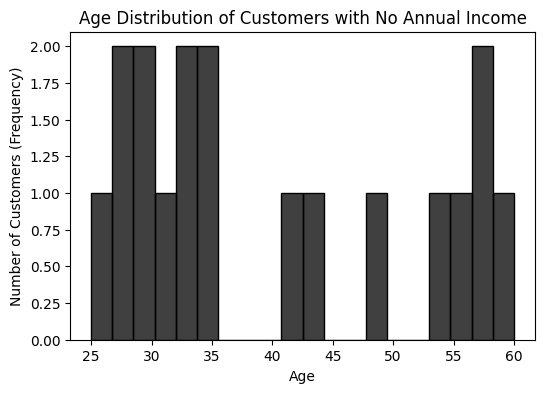

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
no_income_customers = merged_data[merged_data['Annual Income'] == 0]
print(f"Number of customers with no annual income: {len(no_income_customers)}")
plt.figure(figsize=(6, 4))
sns.histplot(no_income_customers['age'], kde=False, bins=20, color='Black', stat='count')
plt.title('Age Distribution of Customers with No Annual Income')
plt.xlabel('Age')
plt.ylabel('Number of Customers (Frequency)')
plt.show()


### INSIGHTS

- This distribution might suggest that customers with no income are more likely to be either young adults (possibly students or recent graduates) or near retirement age. The middle-age group (40-50) has fewer representatives, which could indicate that this age group is more likely to have some form of income.
- In the whole dataset, the overall number of customers with no annual income is 18.

2. Loan-less Customers Profile:

Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?


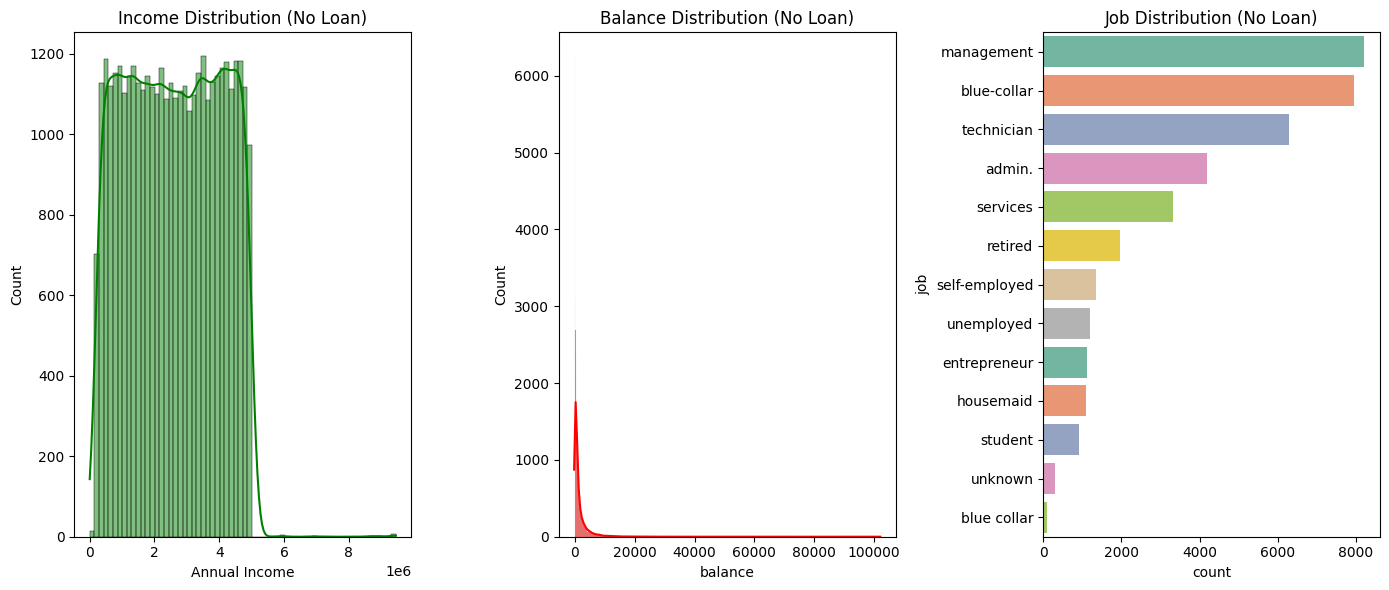

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
no_loan_customers = merged_data[merged_data['loan'] == 'no']

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(no_loan_customers['Annual Income'], kde=True, color='green')
plt.title('Income Distribution (No Loan)')

plt.subplot(1, 3, 2)
sns.histplot(no_loan_customers['balance'], kde=True, color='red')
plt.title('Balance Distribution (No Loan)')

plt.subplot(1, 3, 3)
sns.countplot(y=no_loan_customers['job'], order=no_loan_customers['job'].value_counts().index, palette='Set2')
plt.title('Job Distribution (No Loan)')

plt.tight_layout()
plt.show()


### INSIGHTS

## Income Distribution (No Loan)

The distribution is right-skewed, with most incomes clustered between 0 and 4 million:

- **Peak Range**: There is a peak around 1-2 million annual income.
- **Income Insights**: The distribution suggests that most customers without loans have moderate incomes, with some high earners.


## Balance Distribution (No Loan)

The distribution is extremely right-skewed:

- **Concentration**: Most balances are concentrated near zero.
- **Long Tail**: The long tail extends past 100,000, indicating a few customers with very high balances.
- **Insights**: This suggests that most customers without loans maintain low account balances, with rare exceptions.


## Job Distribution (No Loan)

- **Common Jobs**: Management and blue-collar jobs are the most common, with similar frequencies.
- **Third Largest Group**: Technicians form the third largest group.

3. Loan and Insurance Analysis:


•	Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.


Percentage of customers with loans who have insurance: 4.16%


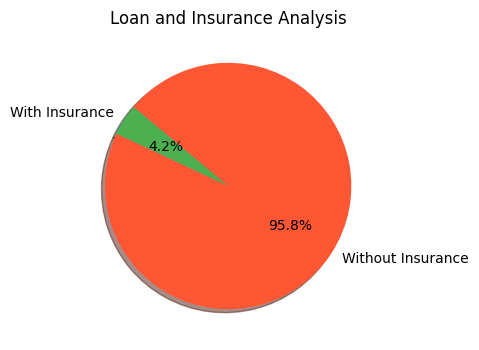

In [23]:
loan_customers = merged_data[merged_data['loan'] == 'yes']
loan_with_insurance = loan_customers[loan_customers['Insurance'] == 'yes']
percentage = (len(loan_with_insurance) / len(loan_customers)) * 100
print(f"Percentage of customers with loans who have insurance: {percentage:.2f}%")
labels = ['With Insurance', 'Without Insurance']
sizes = [len(loan_with_insurance), len(loan_customers) - len(loan_with_insurance)]
colors = ['#4CAF50', '#FF5733']
plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan and Insurance Analysis')
plt.show()


## Insurance Coverage Among Customers with Loans
- This could indicate that insurance is not a requirement for obtaining a loan in this context.
- It might suggest that customers are either not offered insurance with their loans, choose not to purchase it, or cannot afford it.


4. Communication Strategy Insights:


•	Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions


In [24]:
merged_data['contact'].unique()

array(['unknown', '?', 'cellular', 'telephone', 'Mobile', 'Tel'],
      dtype=object)

contact
Tel          0.550000
cellular     0.149170
telephone    0.132632
unknown      0.040808
?            0.000000
Mobile       0.000000
Name: Term Deposit, dtype: float64


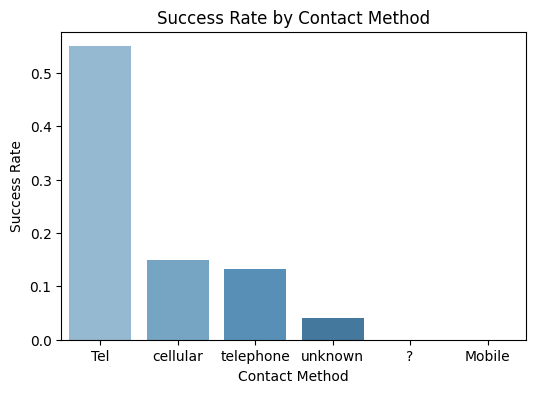

In [25]:
contact_success = merged_data.groupby('contact')['Term Deposit'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
print(contact_success)
plt.figure(figsize=(6,4))
sns.barplot(x=contact_success.index, y=contact_success.values, palette='Blues_d')
plt.title('Success Rate by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Success Rate')
plt.show()

## Contact Method Interpretation

- The data indicates that traditional telephone contact is the most successful method for converting leads into term deposits, while other methods, particularly mobile contact, are less effective. This insight can guide marketing strategies, emphasizing the importance of direct telephone outreach for better conversion rates.

Age and Home Loans:


•	Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


age_group
(20, 30]    58.228761
(30, 40]    63.513514
(40, 50]    56.766616
(50, 60]    41.961076
(60, 70]     9.898108
(70, 80]     3.038674
(80, 90]     0.000000
Name: Customer_number, dtype: float64


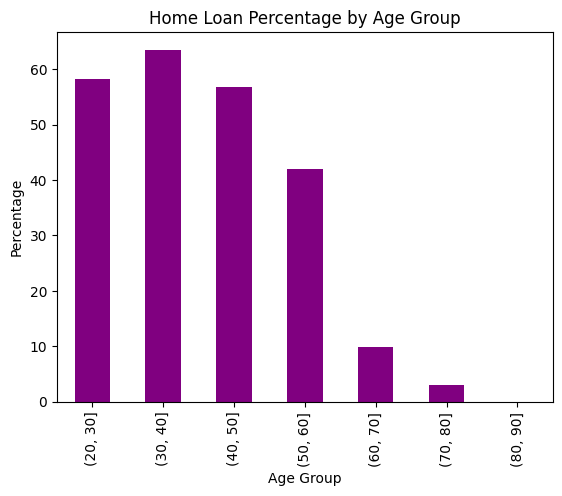

In [26]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
merged_data['age_group'] = pd.cut(merged_data['age'], bins=age_bins)
home_loan_age_group = merged_data[merged_data['housing'] == 'yes'].groupby('age_group')['Customer_number'].count()
total_age_group = merged_data.groupby('age_group')['Customer_number'].count()
home_loan_percentage = (home_loan_age_group / total_age_group) * 100
print(home_loan_percentage)
home_loan_percentage.plot(kind='bar', color='purple')
plt.title('Home Loan Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()


## Age and Home Loan Distribution Interpretation

- **Age Groups 20-30 and 30-40**: These groups show the highest percentages of home loan uptake, with both groups exceeding 60%.

- **Age Group 40-50**: This group also shows a significant percentage, though slightly lower than the 30-40 age group. This may indicate that individuals in this age range are either more established in their careers or have already made housing investments.

- **Age Groups 50-60 and 60-70**: The percentages begin to decline in these groups, indicating a reduced interest or need for home loans as individuals approach retirement age. This could reflect a trend where older adults are less likely to take on new debt.

- **Age Group 70-80 and 80-90**: These groups show very low percentages, suggesting that home loan uptake is minimal among older adults. This may be due to a preference for downsizing, living in retirement communities, or having already paid off their homes.


6. Income and Age Relationship:



•	Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

In [27]:
correlation = merged_data[['age', 'Annual Income']].corr()
correlation

,age,Annual Income
age,1.000000,0.000881
Annual Income,0.000881,1.000000



## Correlation Interpretation:
- The weak correlation suggest that factors other than age may play a more critical role in determining annual income.

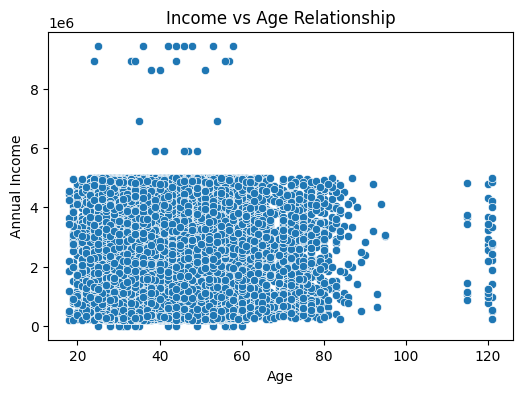

In [28]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=merged_data['age'], y=merged_data['Annual Income'])
plt.title('Income vs Age Relationship')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


## Age And Income Interpretation
- The scatter plot shows a dense cluster of points primarily between ages 20 and 80.
- Annual incomes are mostly concentrated below 4 million.
- This indicates that most individuals in the dataset have annual incomes that do not vary significantly with age.
- Overall, the analysis indicates that there is no significant relationship between age and annual income in this dataset.

In [29]:
merged_data.columns

Index(['Sno', 'Customer_number', 'Insurance', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Term Deposit', 'Count_Txn', 'age', 'job', 'marital',
       'education', 'Annual Income', 'Gender', 'age_group'],
      dtype='object')

In [30]:
merged_data['Term Deposit'].value_counts(normalize=True)

Term Deposit
no         0.882858
yes        0.116965
unknown    0.000177
Name: proportion, dtype: float64

In [31]:
merged_data.head(10)

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,...,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender,age_group
0,0,1001,no,2143,yes,no,unknown,261.0,1,2,...,unknown,no,351.0,58,management,married,tertiary,839368,M,"(50, 60]"
1,1,1002,no,29,yes,no,unknown,151.0,1,2,...,unknown,no,326.0,44,technician,single,secondary,1452858,M,"(40, 50]"
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,...,unknown,no,422.0,33,entrepreneur,married,unknown,4851383,F,"(30, 40]"
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,...,unknown,no,113.0,47,blue collar,married,unknown,3207754,F,"(40, 50]"
4,4,1005,no,1,no,no,unknown,198.0,1,2,...,unknown,no,342.0,33,unknown,single,unknown,2562322,M,"(30, 40]"
5,5,1006,no,231,yes,no,unknown,139.0,1,2,...,unknown,no,490.0,35,management,married,ter tiary,3960603,M,"(30, 40]"
6,6,1007,no,447,yes,yes,unknown,217.0,1,2,...,unknown,no,411.0,28,management,single,ter tiary,2383284,M,"(20, 30]"
7,7,1008,yes,2,yes,no,unknown,380.0,1,2,...,pending,no,108.0,42,entrepreneur,divorced,tertiary,0,F,"(40, 50]"
8,8,1009,no,121,yes,no,unknown,50.0,1,2,...,pending,no,328.0,58,retired,married,primary,1122246,F,"(50, 60]"
9,9,1010,no,593,yes,no,unknown,55.0,1,2,...,pending,no,124.0,43,technician,single,secondary,1111232,M,"(40, 50]"


In [32]:
merged_data

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,...,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender,age_group
0,0,1001,no,2143,yes,no,unknown,261.0,1,2,...,unknown,no,351.0,58,management,married,tertiary,839368,M,"(50.0, 60.0]"
1,1,1002,no,29,yes,no,unknown,151.0,1,2,...,unknown,no,326.0,44,technician,single,secondary,1452858,M,"(40.0, 50.0]"
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,...,unknown,no,422.0,33,entrepreneur,married,unknown,4851383,F,"(30.0, 40.0]"
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,...,unknown,no,113.0,47,blue collar,married,unknown,3207754,F,"(40.0, 50.0]"
4,4,1005,no,1,no,no,unknown,198.0,1,2,...,unknown,no,342.0,33,unknown,single,unknown,2562322,M,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,45206,46207,no,825,no,no,cellular,0.0,0,-1,...,unknown,yes,152.0,51,technician,married,tertiary,2229818,M,"(50.0, 60.0]"
45206,45207,46208,no,1729,no,no,cellular,0.0,0,-1,...,unknown,yes,334.0,121,retired,divorced,primary,2783556,M,NaN
45207,45208,46209,no,5715,no,no,cellular,1127.0,5,184,...,success,yes,381.0,72,retired,married,secondary,443512,M,"(70.0, 80.0]"
45208,45209,46210,no,668,no,no,telephone,0.0,0,-1,...,unknown,no,211.0,57,blue-collar,married,secondary,4193684,F,"(50.0, 60.0]"


Modeling:
1) Term Deposit and Related Variables:
•	Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?


## Choosing Chi-Square Testing For  association among categorical and Target Variable

### Reasons
- **Categorical Data:** Chi-Square tests are designed specifically for categorical data, making them ideal for examining relationships between categorical variables such as `Insurance`, `Housing`, `Job`, etc., and `Term Deposit`.

### Testing Independence
- **Independence Hypothesis:** The Chi-Square test assesses whether the observed distribution of categorical data differs significantly from what would be expected if the variables were independent.

## Hypotheses for Chi-Square Test
=
- **Null Hypothesis (H0):** 
  - There is no association between the two categorical variables. In other words, the variables are independent of each other.

- **Alternative Hypothesis (H1):** 
  - There is a significant association between the two categorical variables. In other words, the variables are dependent on each other.


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency
categorical_vars = merged_data.select_dtypes(include=['object', 'category']).columns
categorical_vars = [var for var in categorical_vars if var != 'Term Deposit']
def chi_square_test(df, cat_var, target_var):
    contingency_table = pd.crosstab(df[cat_var], df[target_var])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value
p_values = {}

for cat_var in categorical_vars:
    p_values[cat_var] = chi_square_test(merged_data, cat_var, 'Term Deposit')
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Categorical Variable', 'p-value'])
print(p_values_df)

  Categorical Variable        p-value
0            Insurance   1.078222e-05
1              housing  2.455685e-191
2                 loan   5.980850e-45
3              contact  2.361533e-228
4             poutcome   0.000000e+00
5                  job  2.763817e-163
6              marital   2.069217e-42
7            education   1.162953e-46
8               Gender   1.213251e-01
9            age_group  1.091405e-261


## Interpretation of P-Values

### Highly Significant Variables
The following variables show very strong associations with `Term Deposit`, as their p-values are extremely small (much less than 0.05) reject the null Hypothesis:

- **Insurance**
- **Housing**
- **Loan**
- **Contact**
- **Poutcome**
- **Job**
- **Marital**
- **Education**
- **Age Group**

### Not Significant Variable
- **Gender**: This variable has a p-value greater than 0.05, indicating that there is no significant association with `Term Deposit`.


In [34]:
merged_data['Term Deposit'] = merged_data['Term Deposit'].map({'yes': 1, 'no': 0})
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
correlations = merged_data[numerical_cols].corr()['Term Deposit'].sort_values(ascending=False)
print("Correlation with 'Term Deposit':")
print(correlations)


Correlation with 'Term Deposit':
Term Deposit        1.000000
duration            0.393394
Sno                 0.296364
Customer_number     0.296364
last_contact_day    0.103024
previous            0.093244
age                 0.030804
Count_Txn          -0.002398
campaign           -0.073488
Name: Term Deposit, dtype: float64


**Interpretation:** 
- The `duration` variable shows a moderate positive correlation (0.393) with the likelihood of a term deposit, indicating longer calls may lead to higher chances of a deposit.

2) 
Predictive Model Building:
•	Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
features = ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'age_group', 'duration']
target = 'Term Deposit'

df_encoded = pd.get_dummies(merged_data[features], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, merged_data[target], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[['duration']] = scaler.fit_transform(X_train[['duration']])
X_test[['duration']] = scaler.transform(X_test[['duration']])

In [36]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    metrics = {
        'Accuracy (Test)': accuracy_score(y_test, y_test_pred),
        'Precision (Test)': precision_score(y_test, y_test_pred),
        'Recall (Test)': recall_score(y_test, y_test_pred),
        'F1-Score (Test)': f1_score(y_test, y_test_pred),
        'ROC-AUC (Test)': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    return accuracy_train, metrics, conf_matrix
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    accuracy_train, metrics, conf_matrix = evaluate_model(model, X_train, y_train, X_test, y_test)
    print("Accuracy (Train):", accuracy_train)
    print("Accuracy (Test):", metrics['Accuracy (Test)'])
    print("Other Metrics (Test):", metrics)
    print("Confusion Matrix (Test):\n", conf_matrix)



Evaluating Logistic Regression:
Accuracy (Train): 0.9018859576350866
Accuracy (Test): 0.8963495575221239
Other Metrics (Test): {'Accuracy (Test)': 0.8963495575221239, 'Precision (Test)': 0.6254355400696864, 'Recall (Test)': 0.33209990749306195, 'F1-Score (Test)': 0.43383685800604227, 'ROC-AUC (Test)': 0.889946149780809}
Confusion Matrix (Test):
 [[7744  215]
 [ 722  359]]

Evaluating Decision Tree:
Accuracy (Train): 0.9953265859189204
Accuracy (Test): 0.8545353982300885
Other Metrics (Test): {'Accuracy (Test)': 0.8545353982300885, 'Precision (Test)': 0.3944043321299639, 'Recall (Test)': 0.40425531914893614, 'F1-Score (Test)': 0.39926907263590683, 'ROC-AUC (Test)': 0.6615441487298631}
Confusion Matrix (Test):
 [[7288  671]
 [ 644  437]]

Evaluating Random Forest:
Accuracy (Train): 0.995215972567889
Accuracy (Test): 0.8808628318584071
Other Metrics (Test): {'Accuracy (Test)': 0.8808628318584071, 'Precision (Test)': 0.5023364485981309, 'Recall (Test)': 0.39777983348751156, 'F1-Score (Tes

# Model Evaluation Summary

| Model                | Train Accuracy | Test Accuracy | Precision (Test) | Recall (Test) | F1-Score (Test) | ROC-AUC (Test) |
|----------------------|----------------|---------------|------------------|---------------|-----------------|----------------|
| Logistic Regression  | 0.90           | 0.90          | 0.63             | 0.33          | 0.43            | 0.89           |
| Decision Tree        | 0.99           | 0.85          | 0.39             | 0.40          | 0.40            | 0.66           |
| Random Forest        | 0.99           | 0.88          | 0.50             | 0.40          | 0.44            | 0.85           |
| Support Vector Machine | 0.91        | 0.90          | 0.64             | 0.32          | 0.43            | 0.83           |
| K-Nearest Neighbors  | 0.92           | 0.89          | 0.56             | 0.37          | 0.45            | 0.81           |

**Key Points:**
- **Best Generalization:** Logistic Regression and SVM with balanced accuracy and high ROC-AUC.
- **Overfitting:** Decision Tree and Random Forest show signs of overfitting.
- **Moderate Performance:** K-Nearest Neighbors performs well but is slightly weaker than the top models.


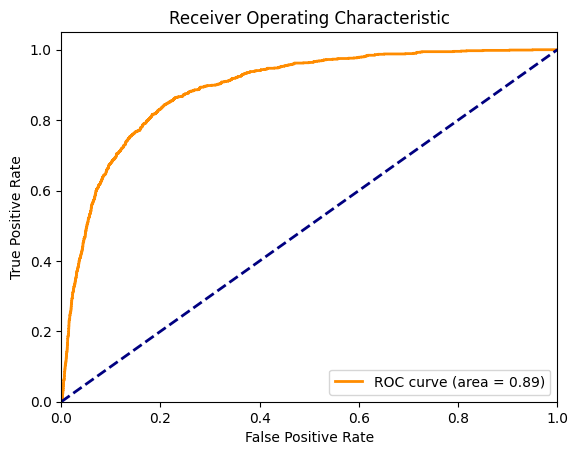

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Model Performance Interpretation

- **AUC (Area Under the Curve):**
  - The curve being well above the diagonal line indicates that the model performs significantly better than random guessing.
  - An AUC of 0.89 suggests good overall performance. The closer the AUC is to 1, the better the model's ability to distinguish between classes.

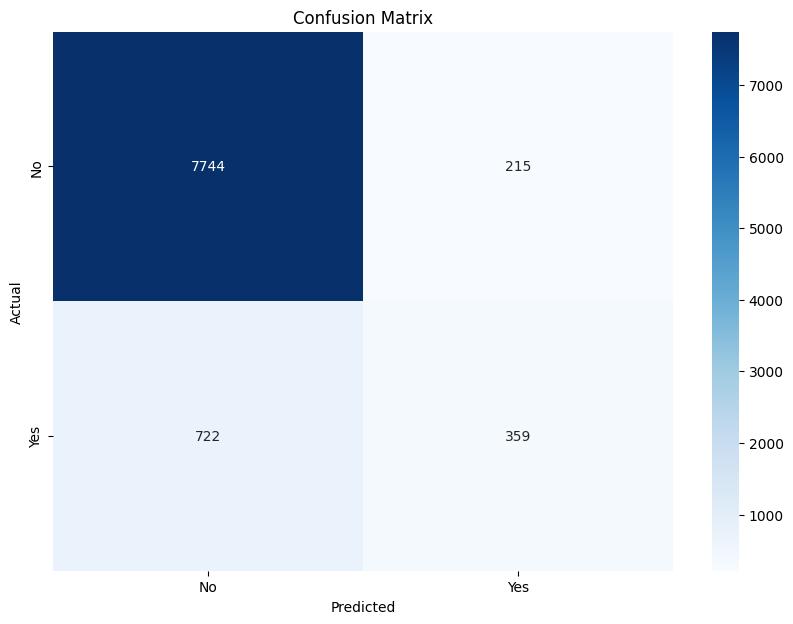

In [39]:
import seaborn as sns
import numpy as np
conf_matrix = np.array([[7744,  215], [ 722,  359]])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Model Performance Interpretation

- **Performance on Classes:**
  - The model performs well in predicting "No" cases (7744 correct out of 7959).
  - It struggles more with predicting "Yes" cases (359 correct out of 1081).

- **Performance Metrics (calculated from the matrix):**
  - **Accuracy:** 89.6%

- **Overall Assessment:**
  - The model has high accuracy overall, mainly due to its good performance on the majority "No" class.

3) Model Improvement Strategies:


•	Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.


## Techniques for Model Improvement

### SMOTE (Synthetic Minority Over-sampling Technique)
### GridSearchCV
### Bagging (Bootstrap Aggregating)
### Boosting
### Cross-Validation

## SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a technique used to address class imbalance in datasets. It works by generating synthetic examples for the minority class to create a more balanced dataset. 
Based on KNN Algo


In [40]:
merged_data['Term Deposit'].value_counts()

Term Deposit
0.0    39914
1.0     5288
Name: count, dtype: int64

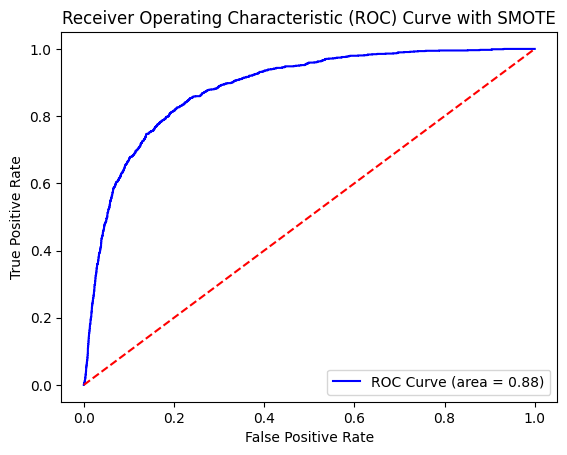

Precision: 0.406172224987556
Recall: 0.7548566142460684
Confusion Matrix:
 [[6766 1193]
 [ 265  816]]


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with SMOTE')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


## GridSearchCV

`GridSearchCV` is a technique for hyperparameter tuning that helps to improve model performance by systematically searching for the best combination of hyperparameters.
- Helps in finding the optimal set of hyperparameters for the model.
- Ensures that the chosen parameters generalize well to unseen data by using cross-validation.

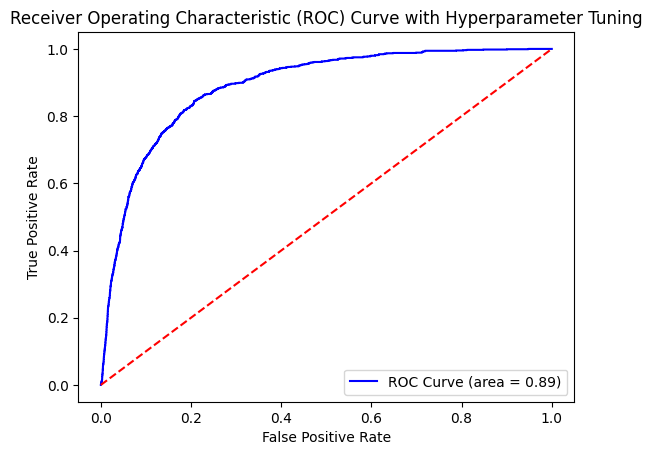

Precision: 0.625
Recall: 0.3330249768732655
Confusion Matrix:
 [[7743  216]
 [ 721  360]]


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
y_probs = best_log_reg.predict_proba(X_test)[:, 1]
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


## Bagging Classifier

Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves the stability and accuracy of machine learning algorithms. It works by combining the predictions of multiple base estimators to create a more robust model.


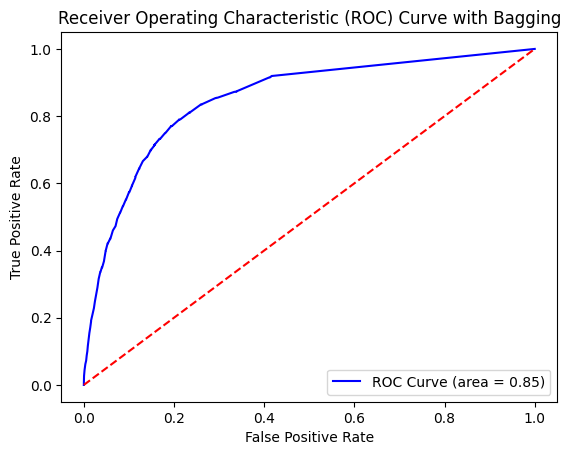

Accuracy with Bagging: 0.8853982300884956
ROC-AUC Score with Bagging: 0.8513073883858289
Precision: 0.5274056029232643
Recall: 0.4005550416281221
Confusion Matrix:
 [[7571  388]
 [ 648  433]]


In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_probs = bagging_model.predict_proba(X_test)[:, 1]
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Bagging')
plt.legend(loc='lower right')
plt.show()

print("Accuracy with Bagging:", accuracy)
print("ROC-AUC Score with Bagging:", roc_auc)
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)



## Boosting

Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner. It focuses on correcting the errors made by previous models in the sequence.


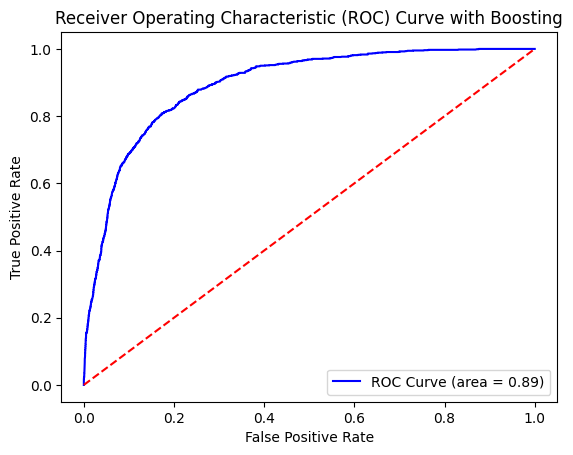

Accuracy with Boosting: 0.8952433628318585
ROC-AUC Score with Boosting: 0.893565764134157
Precision: 0.6
Recall: 0.37187789084181316
Confusion Matrix:
 [[7691  268]
 [ 679  402]]


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_model.fit(X_train, y_train)
y_probs = boosting_model.predict_proba(X_test)[:, 1]
y_pred = boosting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Boosting')
plt.legend(loc='lower right')
plt.show()

print("Accuracy with Boosting:", accuracy)
print("ROC-AUC Score with Boosting:", roc_auc)
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


## Cross-Validation

Cross-Validation is a technique used to assess the performance and generalizability of a machine learning model. It helps to ensure that the model performs well on unseen data by dividing the data into multiple training and validation sets.



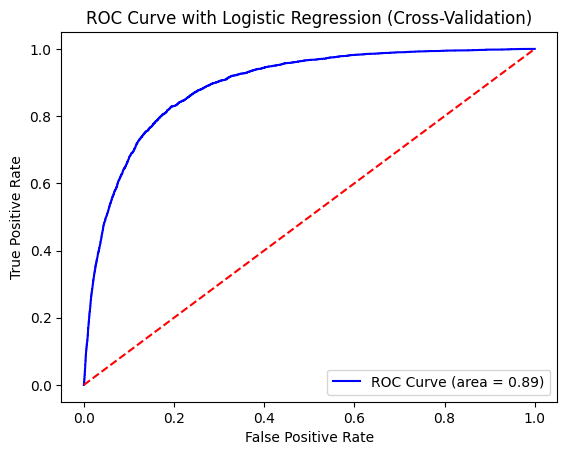

ROC-AUC Score with Logistic Regression: 0.8920557146394175
Precision: 0.6
Recall: 0.37187789084181316
Confusion Matrix:
 [[7691  268]
 [ 679  402]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
model = LogisticRegression()
y_probs = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_probs)
roc_auc = roc_auc_score(y_train, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logistic Regression (Cross-Validation)')
plt.legend(loc='lower right')
plt.show()

print("ROC-AUC Score with Logistic Regression:", roc_auc)
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


### Model Comparison

**1. Accuracy:**
- **Original Model:** 0.896 (highest test accuracy)
- **Boosting and Bagging Models:** 0.895 (comparable to the original model)

**2. ROC-AUC:**
- **Boosting Model:** 0.894 (highest ROC-AUC score)
- **Bagging Model:** 0.893 (closely follows boosting)
- **Original Model:** 0.653 (lower ROC-AUC score)

**3. Precision and Recall:**
- **GridSearchCV:**
  - **Precision:** 0.625 (highest precision)
  - **Recall:** 0.333 (lowest recall)
- **SMOTE:**
  - **Precision:** 0.406 (lower precision)
  - **Recall:** 0.755 (highest recall)
- **Bagging and Boosting:**
  - **Precision:** 0.6 (same precision)
  - **Recall:** 0.372 (same recall)

**4. F1-Score:**
- **Original Model:** 0.434 (indicates balance between precision and recall)
- **F1-Scores for other models:** Not directly provided

### Summary

- **For highest accuracy:** Use the **Original Model**.
- **For best ROC-AUC score:** Choose **Boosting**.
- **For highest precision:** Opt for **GridSearchCV**.
- **For highest recall:** Select **SMOTE**.
- **For a balanced approach:** **Boosting** or **Bagging** are strong candidates.
